In [1]:
#판다스 _2
#위에 내용은 판다스 2에서 정리했고
#현재 2.3.1, 결측값 구하는 거 새 페이지로 작성할 것임

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
ebola = pd.read_csv('country_timeseries.csv')

In [4]:
ebola.describe()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
count,122.000000,93.000000,83.000000,87.000000,38.000000,25.00,18.000000,16.0,12.000000,92.000000,81.000000,87.000000,38.000000,22.0,18.000000,16.000000,12.000000
mean,144.778689,911.064516,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.500000,563.239130,1101.209877,693.701149,6.131579,0.0,0.833333,0.187500,3.166667
std,89.316460,849.108801,2987.966721,3184.803996,5.998577,0.40,1.178511,0.0,2.746899,508.511345,1297.208568,869.947073,2.781901,0.0,0.383482,0.403113,2.405801
min,0.000000,49.000000,3.000000,0.000000,0.000000,1.00,1.000000,1.0,1.000000,29.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,66.250000,236.000000,25.500000,64.500000,15.000000,1.00,3.000000,1.0,1.000000,157.750000,12.000000,6.000000,4.000000,0.0,1.000000,0.000000,1.000000
50%,150.000000,495.000000,516.000000,783.000000,20.000000,1.00,4.000000,1.0,2.500000,360.500000,294.000000,334.000000,8.000000,0.0,1.000000,0.000000,2.000000
75%,219.500000,1519.000000,4162.500000,3801.000000,20.000000,1.00,4.000000,1.0,6.250000,847.750000,2413.000000,1176.000000,8.000000,0.0,1.000000,0.000000,6.000000
max,289.000000,2776.000000,8166.000000,10030.000000,22.000000,3.00,4.000000,1.0,7.000000,1786.000000,3496.000000,2977.000000,8.000000,0.0,1.000000,1.000000,6.000000


In [5]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [10]:
np.count_nonzero([0,0,1,1,1,1])
#제로가 아닌 값을 세어줄거임
np.count_nonzero([0,0,1,1,1,1,123,425,1,3,511,0])

9

In [12]:
ebola.isnull()
#false = 0, true = 1
#값이 있는 값은 false, 값이 없는 값을 true나오게 한 것 같은데?

np.count_nonzero(ebola.isnull())

1214

In [13]:
np.count_nonzero(ebola['Cases_Guinea'].isnull())

29

In [15]:
print("Cases_Guinea : ", np.count_nonzero(ebola['Cases_Guinea'].isnull()))
print("Cases_UnitedStates : ", np.count_nonzero(ebola['Cases_UnitedStates'].isnull()))

Cases_Guinea :  29
Cases_UnitedStates :  104


In [16]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


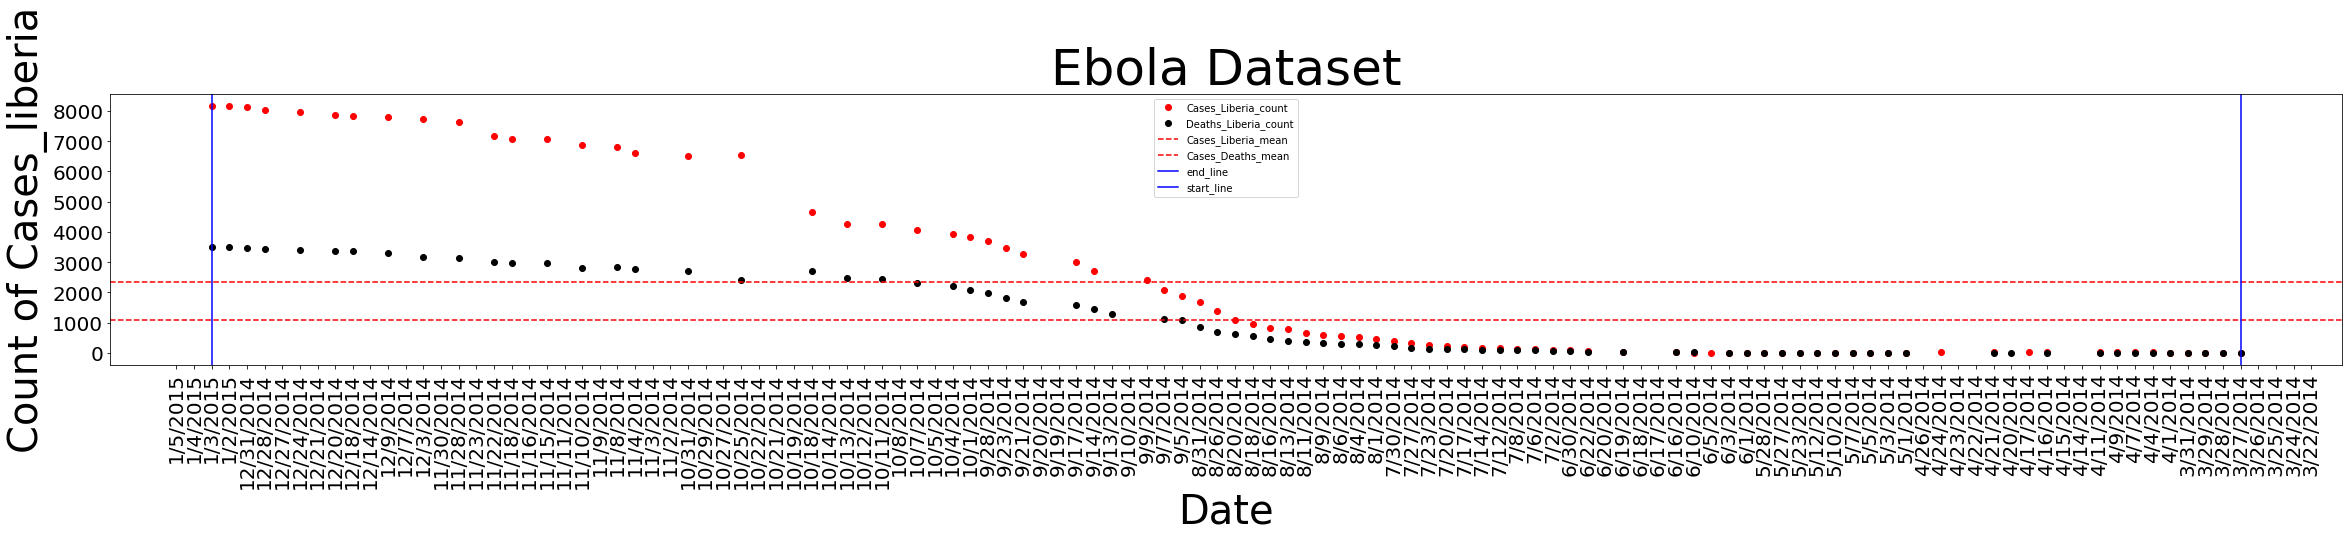

In [29]:
plt.figure(figsize = (40,5))
plt.title("Ebola Dataset", fontsize = 50)

plt.plot(ebola['Date'], ebola['Cases_Liberia'], 'o',
         color = 'red', label = 'Cases_Liberia_count')
plt.plot(ebola['Date'], ebola['Deaths_Liberia'], 'o',
         color = 'Black', label = 'Deaths_Liberia_count')

plt.axhline(y = ebola['Cases_Liberia'].mean(),
            linestyle = '--',
            color = 'red',
            label = 'Cases_Liberia_mean')

plt.axhline(y = ebola['Deaths_Liberia'].mean(),
            linestyle = '--',
            color = 'red',
            label = 'Cases_Deaths_mean')

#plt.axvline(x = ebola['Date'][61], color = 'blue', label = 'line')
plt.axvline(x = '1/3/2015', color = 'blue', label = 'end_line')
plt.axvline(x = '3/27/2014', color = 'blue', label = 'start_line')
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)

plt.xlabel('Date', size = 40)
plt.ylabel('Count of Cases_liberia', size = 40)
plt.legend()
plt.show()

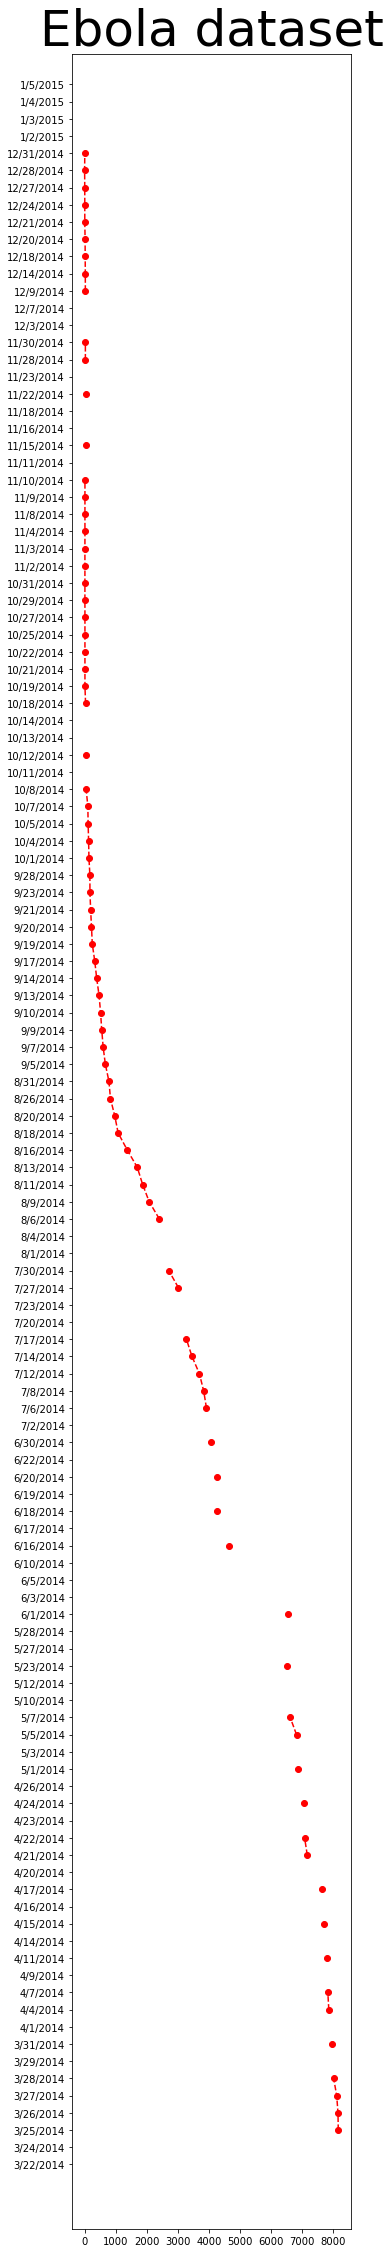

In [22]:
plt.figure(figsize = (5,40))
plt.title("Ebola dataset", fontsize = 50)

plt.plot(ebola['Cases_Liberia'], ebola['Date'], '--o', color = 'red')